# K-MEANS

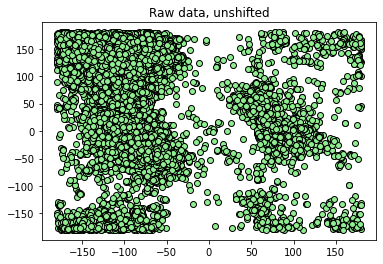

MIN -179.024507 MAX 179.41402300000001


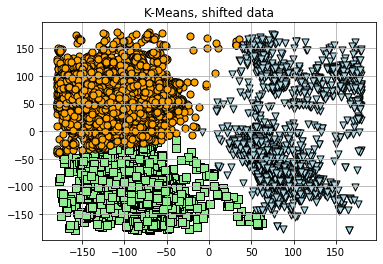

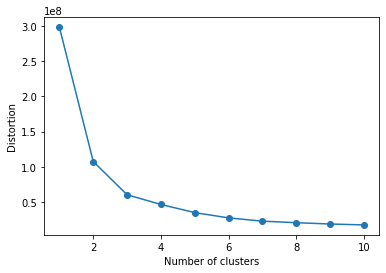

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('data_all.csv')

phi = []
psi_ = []
psi = []
res_ = []

def shift_data(number, amount):
    if number + amount > min(psi_):
        number = number + amount
    else: 
        number = max(psi_) + ((number + amount) - min(psi_))
    
    return number
    
for i in range(0, data.shape[0]):
    res_.append(data.loc[i][0])
    phi.append(data.loc[i][3])  
    psi_.append(data.loc[i][4])
    
plt.scatter(phi, psi_, c="lightgreen", edgecolor='black')
plt.title("Raw data, unshifted")
plt.show()

for i in range(0, data.shape[0]):
    shifted =  shift_data(psi_[i], -80)    
    psi.append(shifted)
    
print("MIN", min(psi), "MAX", max(psi))
res = np.asarray(res_)
    
combos = np.column_stack([phi, psi])    

model = KMeans(
    n_clusters=3, init='random',
    n_init=100, max_iter=3000, 
    tol=1e-04, random_state=0)
prediction = model.fit_predict(combos)

plt.scatter(
    combos[prediction == 0, 0], combos[prediction == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    combos[prediction == 1, 0], combos[prediction == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    combos[prediction == 2, 0], combos[prediction == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    combos[prediction == 3, 0], combos[prediction == 3, 1],
    s=50, c='yellow',
    marker='v', edgecolor='black',
    label='cluster 4'
)

plt.grid()
plt.title("K-Means, shifted data")
plt.show()

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=20, max_iter=100,
        tol=1e-04, random_state=0
    )
    km.fit(combos)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()



# DBSCAN

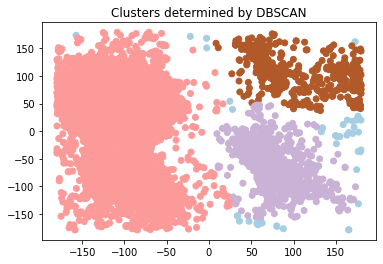

Outliers: 55 



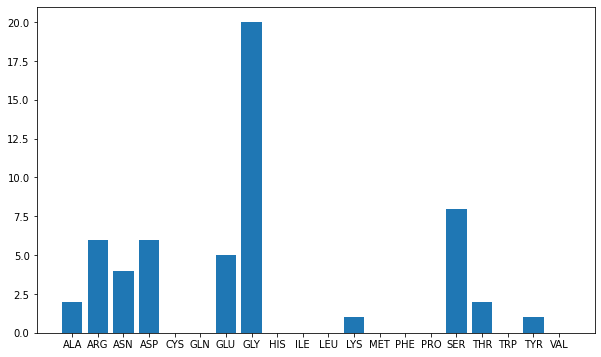

In [77]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=35, min_samples=100)
db.fit(combos)

y_pred = db.fit_predict(combos)
# plt.figure(figsize=(10,6))
plt.scatter(combos[:,0], combos[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters determined by DBSCAN")
plt.show()

print("Outliers:", db.labels_[db.labels_ == -1].size, "\n")

# ------------ Make Bar Chart --------------
residue_names = np.unique(res)
residue_values = np.zeros(residue_names.shape[0])

for i in range(0, data.shape[0]):
    if res[i] in residue_names and y_pred[i] == -1:
        position = np.where(residue_names == res[i])[0][0]       
        residue_values[position] += 1

plt.figure(figsize=(10,6))
plt.bar(residue_names, residue_values)

plt.show()

# Del 4

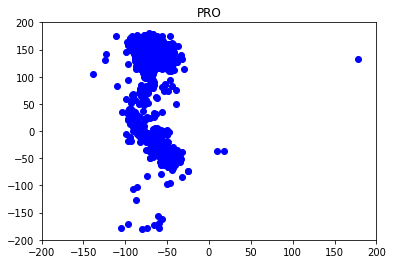

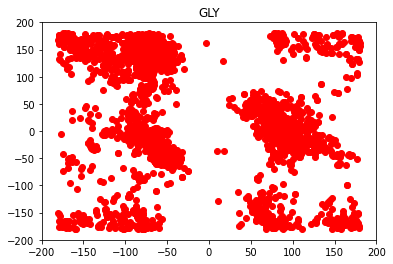

In [78]:
selected_cluster_phi = []
selected_cluster_psi = []

def get_cluster(name):
    for i in range(0, len(res)):
        if res[i] == name:
            selected_cluster_phi.append(data.loc[i][3])
            selected_cluster_psi.append(data.loc[i][4])

get_cluster("PRO")
clusters = np.column_stack([selected_cluster_phi, selected_cluster_psi])    

plt.title("PRO")
plt.scatter(clusters[:, 0], clusters[:, 1], c="blue")
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.show()

get_cluster("GLY")
clusters = np.column_stack([selected_cluster_phi, selected_cluster_psi])    
plt.title("GLY")
plt.scatter(clusters[:, 0], clusters[:, 1], c="red")
plt.xlim(-200, 200)
plt.ylim(-200, 200)

plt.show()